In [130]:
import pandas as pd 
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.proportion import proportion_confint

# Part 1: Statistical Analysis of Football Match Results of the 5 Countries that have Played the Most Matches

The following is an analysis of the probability of a country winning or losing a match. The data used includes the results of 43,170 international football matches starting in 1872 up to 2019. The data includes 9 columns which are the date of the match, home team, away team, home team scores, away team scores, name of the tournament, city match was played in, country match was played in, and a true or false column indicating whether the match was played on neutral ground. I have chosen to analyize the match results for the 5 countries that have played the most matches. Those countries are: the United States, France, Malaysia, France, and Sweden. I will find the probability that each of these countries wins a match, home or away, and friendly or official, with a 95% confidence interval. 

In [147]:
df = pd.read_csv("results.csv")

In [148]:
df.head(10)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False
5,1876-03-25,Scotland,Wales,4,0,Friendly,Glasgow,Scotland,False
6,1877-03-03,England,Scotland,1,3,Friendly,London,England,False
7,1877-03-05,Wales,Scotland,0,2,Friendly,Wrexham,Wales,False
8,1878-03-02,Scotland,England,7,2,Friendly,Glasgow,Scotland,False
9,1878-03-23,Scotland,Wales,9,0,Friendly,Glasgow,Scotland,False


### Results Column

The column named 'results' shows the results of the match. It says win if the home team wins and lose if they lose. 

In [149]:
x=df['away_score']-df['home_score']
conditions = [
    (x<0),
    (x>0),
    (x==0)
    ]

In [150]:
values= ['win','lose','draw']

In [151]:
df['result'] = np.select(conditions, values)

In [152]:
df.head(10)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,result
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,draw
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,win
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,win
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,draw
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,win
5,1876-03-25,Scotland,Wales,4,0,Friendly,Glasgow,Scotland,False,win
6,1877-03-03,England,Scotland,1,3,Friendly,London,England,False,lose
7,1877-03-05,Wales,Scotland,0,2,Friendly,Wrexham,Wales,False,lose
8,1878-03-02,Scotland,England,7,2,Friendly,Glasgow,Scotland,False,win
9,1878-03-23,Scotland,Wales,9,0,Friendly,Glasgow,Scotland,False,win


### Probability that the home team wins

95% confidence interval of the probability that the home team wins and that the home team loses and that the match ends in a draw

In [159]:
x=df['result'].value_counts()
x=np.array(x)

In [160]:
N=x.sum()

In [161]:
CI_win=proportion_confint(count=x[1],nobs=N,alpha=(1-.95))
CI_win

(0.27879305599044235, 0.28729011526083115)

In [162]:
CI_lose=proportion_confint(count=x[0],nobs=N,alpha=(1-.95))
CI_lose

(0.481740705905987, 0.49116843552218753)

In [163]:
CI_draw=proportion_confint(count=x[2],nobs=N,alpha=(1-.95))
CI_draw

(0.2265318471530234, 0.23447584016752862)

In [179]:
n = 10
df['country'].value_counts()[:n].index.tolist()

['United States',
 'France',
 'Malaysia',
 'England',
 'Sweden',
 'Germany',
 'Brazil',
 'Qatar',
 'Spain',
 'United Arab Emirates']

### The United States

In [180]:
dfus=df[df['country']=='United States']
dfus.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,result
41,1885-11-28,United States,Canada,0,1,Friendly,Newark,United States,False,lose
48,1886-11-25,United States,Canada,3,2,Friendly,Newark,United States,False,win
935,11/8/1925,United States,Canada,6,1,Friendly,New York,United States,False,win
1022,11/6/1926,United States,Canada,6,2,Friendly,New York,United States,False,win
1790,5/19/1935,United States,Scotland,1,5,Friendly,New York,United States,False,lose


In [181]:
dfus['home']=(dfus['home_team']=='United States')

/var/folders/9p/lclsymtn1cz8pt0m19455t0r0000gn/T/ipykernel_61469/3054155073.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfus['home']=(dfus['home_team']=='United States')


In [182]:
dfus['home'].value_counts()

False    826
True     411
Name: home, dtype: int64

In [183]:
x=pd.crosstab(dfus['home'],dfus['result'],margins=True)
x

result,draw,lose,win,All
home,,,,
False,203,290,333,826
True,91,91,229,411
All,294,381,562,1237


In [184]:
x=np.array(x)
x

array([[ 203,  290,  333,  826],
       [  91,   91,  229,  411],
       [ 294,  381,  562, 1237]])

In [185]:
CI_uswin_home=proportion_confint(count=x[1,2],nobs=x[1,3],alpha=(1-.95))
CI_uswin_home

(0.5091557759095878, 0.6051994552339645)

In [186]:
CI_uswin_away=proportion_confint(count=x[0,2],nobs=x[0,3],alpha=(1-.95))
CI_uswin_away

(0.3696955835778047, 0.4365998159379338)

In [187]:
ci_uswin = {}
ci_uswin['home'] = ['Yes','No']
ci_uswin['lb'] = [CI_uswin_home[0],CI_uswin_away[0]]
ci_uswin['ub'] = [CI_uswin_home[1],CI_uswin_away[1]]
df_ci= pd.DataFrame(ci_uswin)
df_ci

,home,lb,ub
0,Yes,0.509156,0.605199
1,No,0.369696,0.436600


([<matplotlib.axis.YTick at 0x7fef944ba1f0>,
 [Text(0, 0, 'Yes'), Text(0, 1, 'No')])

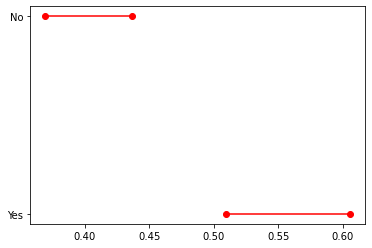

In [188]:
for lb,ub,y in zip(df_ci['lb'],df_ci['ub'],range(len(df_ci))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_ci)),list(df_ci['home']))

The probability of the United States Football team winning a home game is between (0.5091557759095878, 0.6051994552339645), while the probability of them winning an away game is between (0.3696955835778047, 0.4365998159379338). The probability of them winning a home game is clearly higher, which shows that the US team clearly has an advantage when playing inside the US. This could be due to a number of reasons, including the fans. In the US, most fans will be cheering for them, boosting moral. At away games, fans are less likley to cheer for them and so their moral is lower. 

In [245]:
conditions = [
    (dfus['tournament']=='Friendly'),
    (dfus['tournament']!='Friendly')
    ]
values=['Friendly','Official']

In [246]:
dfus['typematch'] = np.select(conditions, values)
dfus['typematch'].value_counts()

/var/folders/9p/lclsymtn1cz8pt0m19455t0r0000gn/T/ipykernel_61469/2674874851.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfus['typematch'] = np.select(conditions, values)


Friendly    653
Official    584
Name: typematch, dtype: int64

In [250]:
x=pd.crosstab(dfus['typematch'],dfus['result'],margins=True)
x

result,draw,lose,win,All
typematch,,,,
Friendly,180,226,247,653
Official,114,155,315,584
All,294,381,562,1237


In [251]:
x=np.array(x)
x

array([[ 180,  226,  247,  653],
       [ 114,  155,  315,  584],
       [ 294,  381,  562, 1237]])

In [252]:
CI_uswin_friendly=proportion_confint(count=x[0,2],nobs=x[0,3],alpha=(1-.95))
CI_uswin_friendly

(0.3410587617395715, 0.4154496609250533)

In [253]:
CI_uswin_official=proportion_confint(count=x[1,2],nobs=x[1,3],alpha=(1-.95))
CI_uswin_official

(0.4989576113893054, 0.5798095118983658)

In [254]:
ci_uswin = {}
ci_uswin['Typematch'] = ['Friendly','Official']
ci_uswin['lb'] = [CI_uswin_friendly[0],CI_uswin_official[0]]
ci_uswin['ub'] = [CI_uswin_friendly[1],CI_uswin_official[1]]
df_ci= pd.DataFrame(ci_uswin)
df_ci

,Typematch,lb,ub
0,Friendly,0.341059,0.41545
1,Official,0.498958,0.57981


([<matplotlib.axis.YTick at 0x7fef946e1430>,
 [Text(0, 0, 'Friendly'), Text(0, 1, 'Official')])

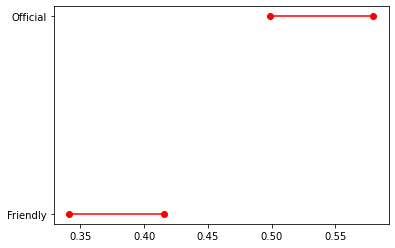

In [255]:
import matplotlib.pyplot as plt
for lb,ub,y in zip(df_ci['lb'],df_ci['ub'],range(len(df_ci))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_ci)),list(df_ci['Typematch']))

The probability of the US football team winning a friendly game is (0.3410587617395715, 0.4154496609250533), while the probability of winning an official match is (0.4989576113893054, 0.5798095118983658). The probability of winning an official match is significantly higher than the probability of winning a friendsly match, which might indicate that the players are more relaxed during a friendly game and are less likley to strain themselves to win. 

### France

In [40]:
df_fr=df[df['country']=='France']
df_fr.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,result
166,2/12/1905,France,Switzerland,1,0,Friendly,Paris,France,False,lose
185,4/22/1906,France,Belgium,0,5,Friendly,Saint-Cloud,France,False,win
215,4/12/1908,France,Belgium,1,2,Friendly,Colombes,France,False,win
257,4/3/1910,France,Belgium,0,4,Friendly,Gentilly,France,False,win
277,1/1/1911,France,Hungary,0,3,Friendly,Maisons-Alfort,France,False,win


In [41]:
df_fr['home']=(df_fr['home_team']=='France')

/var/folders/9p/lclsymtn1cz8pt0m19455t0r0000gn/T/ipykernel_61469/4294217149.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fr['home']=(df_fr['home_team']=='France')


In [42]:
df_fr['home'].value_counts()

True     443
False    375
Name: home, dtype: int64

In [196]:
x=pd.crosstab(df_fr['home'],df_fr['result'],margins=True)
x

result,draw,lose,win,All
home,,,,
False,100,157,118,375
True,89,260,94,443
All,189,417,212,818


In [44]:
x=np.array(x)
x

array([[100, 157, 118, 375],
       [ 89, 260,  94, 443],
       [189, 417, 212, 818]])

In [47]:
CI_fr_win_home=proportion_confint(count=x[1,2],nobs=x[1,3],alpha=(1-.95))
CI_fr_win_home

(0.17411643713822142, 0.2502627953674219)

In [48]:
CI_fr_win_away=proportion_confint(count=x[0,2],nobs=x[0,3],alpha=(1-.95))
CI_fr_win_away

(0.2676654873825878, 0.3616678459507455)

In [49]:
ci_fr_win = {}
ci_fr_win['home'] = ['Yes','No']
ci_fr_win['lb'] = [CI_fr_win_home[0],CI_fr_win_away[0]]
ci_fr_win['ub'] = [CI_fr_win_home[1],CI_fr_win_away[1]]
df_ci= pd.DataFrame(ci_fr_win)
df_ci

,home,lb,ub
0,Yes,0.174116,0.250263
1,No,0.267665,0.361668


([<matplotlib.axis.YTick at 0x7fef934f7e20>,
 [Text(0, 0, 'Yes'), Text(0, 1, 'No')])

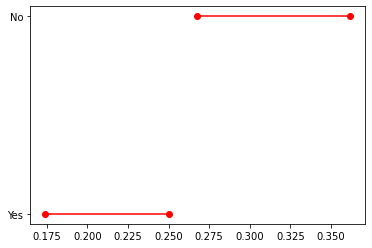

In [50]:
for lb,ub,y in zip(df_ci['lb'],df_ci['ub'],range(len(df_ci))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_ci)),list(df_ci['home']))

The French National Football team is more likley to win away games than home games. The probability of the French team winning a home game is only (0.17411643713822142, 0.2502627953674219), while the probability of them winning an away game is higher at (0.2676654873825878, 0.3616678459507455). The French team appears to not have a home advantage. This could be due to playing conditions in France, or 

In [258]:
conditions = [
    (df_fr['tournament']=='Friendly'),
    (df_fr['tournament']!='Friendly')
    ]
values=['Friendly','Official']

In [261]:
df_fr['typematch'] = np.select(conditions, values)
df_fr['typematch'].value_counts()

Friendly    471
Official    347
Name: typematch, dtype: int64

In [262]:
x=pd.crosstab(df_fr['typematch'],df_fr['result'],margins=True)
x

result,draw,lose,win,All
typematch,,,,
Friendly,112,228,131,471
Official,77,189,81,347
All,189,417,212,818


In [263]:
x=np.array(x)
x

array([[112, 228, 131, 471],
       [ 77, 189,  81, 347],
       [189, 417, 212, 818]])

In [264]:
CI_frwin_friendly=proportion_confint(count=x[0,2],nobs=x[0,3],alpha=(1-.95))
CI_frwin_friendly

(0.2376654895121334, 0.3185977801269324)

In [265]:
CI_frwin_official=proportion_confint(count=x[1,2],nobs=x[1,3],alpha=(1-.95))
CI_frwin_official

(0.18892148425887595, 0.27793730536648426)

In [266]:
ci_frwin = {}
ci_frwin['Typematch'] = ['Friendly','Official']
ci_frwin['lb'] = [CI_frwin_friendly[0],CI_frwin_official[0]]
ci_frwin['ub'] = [CI_frwin_friendly[1],CI_frwin_official[1]]
df_ci= pd.DataFrame(ci_frwin)
df_ci

,Typematch,lb,ub
0,Friendly,0.237665,0.318598
1,Official,0.188921,0.277937


([<matplotlib.axis.YTick at 0x7fef94767190>,
 [Text(0, 0, 'Friendly'), Text(0, 1, 'Official')])

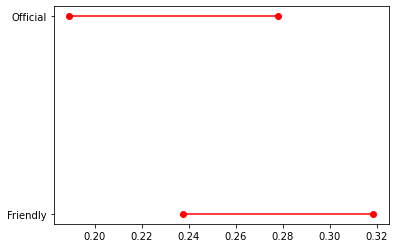

In [267]:
import matplotlib.pyplot as plt
for lb,ub,y in zip(df_ci['lb'],df_ci['ub'],range(len(df_ci))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_ci)),list(df_ci['Typematch']))

The probability of The French Team winning a friendly game is higher than them winning an official game, with the porbability of winning a friendly game being between (0.2376654895121334, 0.3185977801269324) and the probability of them winning an official game being between (0.18892148425887595, 0.27793730536648426). This could be die to nerves and the psychological toll the pressure of an official game could have on the players. 

### Malaysia 

In [212]:
df_mal=df[df['country']=='Malaysia']
df_mal.head(20)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,result
5674,8/22/1964,Malaysia,Thailand,3,0,Merdeka Tournament,Kuala Lumpur,Malaysia,False,win
5675,8/23/1964,Cambodia,Taiwan,0,4,Merdeka Tournament,Kuala Lumpur,Malaysia,True,lose
5677,8/24/1964,Malaysia,India,1,1,Merdeka Tournament,Kuala Lumpur,Malaysia,False,draw
5678,8/27/1964,Cambodia,India,0,4,Merdeka Tournament,Kuala Lumpur,Malaysia,True,lose
5679,8/28/1964,Taiwan,Vietnam Republic,0,0,Merdeka Tournament,Kuala Lumpur,Malaysia,True,draw
5680,8/28/1964,Malaysia,Myanmar,0,3,Merdeka Tournament,Kuala Lumpur,Malaysia,False,lose
5681,8/29/1964,India,Thailand,2,1,Merdeka Tournament,Ipoh,Malaysia,True,win
5682,8/30/1964,Myanmar,Taiwan,2,4,Merdeka Tournament,Kuala Lumpur,Malaysia,True,lose
5683,8/30/1964,Malaysia,Vietnam Republic,1,2,Merdeka Tournament,Kuala Lumpur,Malaysia,False,lose
5684,9/1/1964,Cambodia,Thailand,0,1,Merdeka Tournament,Kuala Lumpur,Malaysia,True,lose


In [213]:
df_mal['home']=(df_mal['home_team']=='Malaysia')

/var/folders/9p/lclsymtn1cz8pt0m19455t0r0000gn/T/ipykernel_61469/2338185661.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mal['home']=(df_mal['home_team']=='Malaysia')


In [216]:
df_mal['home'].value_counts()

False    470
True     274
Name: home, dtype: int64

In [217]:
x=pd.crosstab(df_mal['home'],df_mal['result'],margins=True)
x

result,draw,lose,win,All
home,,,,
False,104,151,215,470
True,69,76,129,274
All,173,227,344,744


In [218]:
x=np.array(x)
x

array([[104, 151, 215, 470],
       [ 69,  76, 129, 274],
       [173, 227, 344, 744]])

In [219]:
CI_mal_win_home=proportion_confint(count=x[1,2],nobs=x[1,3],alpha=(1-.95))
CI_mal_win_home

(0.4117010659354705, 0.5299047734805878)

In [220]:
CI_mal_win_away=proportion_confint(count=x[0,2],nobs=x[0,3],alpha=(1-.95))
CI_mal_win_away

(0.41240761302700635, 0.5024860039942702)

In [221]:
ci_mal_win = {}
ci_mal_win['home'] = ['Yes','No']
ci_mal_win['lb'] = [CI_mal_win_home[0],CI_mal_win_away[0]]
ci_mal_win['ub'] = [CI_mal_win_home[1],CI_mal_win_away[1]]
df_ci= pd.DataFrame(ci_mal_win)
df_ci

,home,lb,ub
0,Yes,0.411701,0.529905
1,No,0.412408,0.502486


([<matplotlib.axis.YTick at 0x7fef93a91760>,
 [Text(0, 0, 'Yes'), Text(0, 1, 'No')])

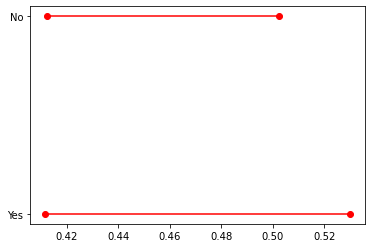

In [222]:
for lb,ub,y in zip(df_ci['lb'],df_ci['ub'],range(len(df_ci))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_ci)),list(df_ci['home']))

The Malaysian Team performs consistently no matter wherr they are playing. The confidence intervals for the both ptobabilities of winning at home and away are similar at (0.4117010659354705, 0.5299047734805878) and (0.41240761302700635, 0.5024860039942702) respectively. 

In [268]:
conditions = [
    (df_mal['tournament']=='Friendly'),
    (df_mal['tournament']!='Friendly')
    ]
values=['Friendly','Official']

In [269]:
df_mal['typematch'] = np.select(conditions, values)

/var/folders/9p/lclsymtn1cz8pt0m19455t0r0000gn/T/ipykernel_61469/1090470193.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mal['typematch'] = np.select(conditions, values)


In [270]:
df_mal['typematch'].value_counts()

Official    657
Friendly     87
Name: typematch, dtype: int64

In [271]:
x=pd.crosstab(df_mal['typematch'],df_mal['result'],margins=True)
x

result,draw,lose,win,All
typematch,,,,
Friendly,26,23,38,87
Official,147,204,306,657
All,173,227,344,744


In [272]:
x=np.array(x)
x

array([[ 26,  23,  38,  87],
       [147, 204, 306, 657],
       [173, 227, 344, 744]])

In [273]:
CI_malwin_friendly=proportion_confint(count=x[0,2],nobs=x[0,3],alpha=(1-.95))
CI_malwin_friendly

(0.3325596937938109, 0.5410035245969937)

In [274]:
CI_malwin_official=proportion_confint(count=x[1,2],nobs=x[1,3],alpha=(1-.95))
CI_malwin_official

(0.42761047206364666, 0.5038963772514218)

In [275]:
ci_malwin = {}
ci_malwin['Typematch'] = ['Friendly','Official']
ci_malwin['lb'] = [CI_malwin_friendly[0],CI_malwin_official[0]]
ci_malwin['ub'] = [CI_malwin_friendly[1],CI_malwin_official[1]]
df_ci= pd.DataFrame(ci_malwin)
df_ci

,Typematch,lb,ub
0,Friendly,0.33256,0.541004
1,Official,0.42761,0.503896


([<matplotlib.axis.YTick at 0x7fef948b5a60>,
 [Text(0, 0, 'Friendly'), Text(0, 1, 'Official')])

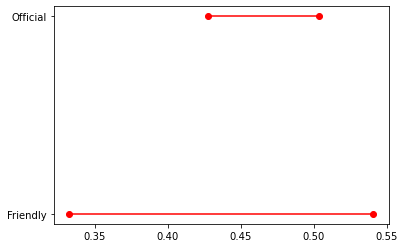

In [276]:
import matplotlib.pyplot as plt
for lb,ub,y in zip(df_ci['lb'],df_ci['ub'],range(len(df_ci))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_ci)),list(df_ci['Typematch']))

The 95% confidence intervals for the Malaysian team overlap, which means that there is no statistcal significance to the difference between between the probability that the Malaysian team will win a home or away game. 

### England 

In [223]:
df_eng=df[df['country']=='England']
df_eng.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,result
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,win
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,draw
6,1877-03-03,England,Scotland,1,3,Friendly,London,England,False,lose
10,1879-01-18,England,Wales,2,1,Friendly,London,England,False,win
11,1879-04-05,England,Scotland,5,4,Friendly,London,England,False,win


In [224]:
df_eng['home']=(df_eng['home_team']=='England')

/var/folders/9p/lclsymtn1cz8pt0m19455t0r0000gn/T/ipykernel_61469/1955478581.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eng['home']=(df_eng['home_team']=='England')


In [225]:
df_eng['home'].value_counts()

True     464
False    253
Name: home, dtype: int64

In [226]:
x=pd.crosstab(df_eng['home'],df_eng['result'],margins=True)
x

result,draw,lose,win,All
home,,,,
False,55,83,115,253
True,101,63,300,464
All,156,146,415,717


In [227]:
x=np.array(x)
x

array([[ 55,  83, 115, 253],
       [101,  63, 300, 464],
       [156, 146, 415, 717]])

In [228]:
CI_eng_win_home=proportion_confint(count=x[1,2],nobs=x[1,3],alpha=(1-.95))
CI_eng_win_home

(0.6030552883111224, 0.6900481599647397)

In [229]:
CI_eng_win_away=proportion_confint(count=x[0,2],nobs=x[0,3],alpha=(1-.95))
CI_eng_win_away

(0.3931896334222213, 0.5159012756686878)

In [230]:
ci_eng_win = {}
ci_eng_win['home'] = ['Yes','No']
ci_eng_win['lb'] = [CI_eng_win_home[0],CI_eng_win_away[0]]
ci_eng_win['ub'] = [CI_eng_win_home[1],CI_eng_win_away[1]]
df_ci= pd.DataFrame(ci_eng_win)
df_ci

,home,lb,ub
0,Yes,0.603055,0.690048
1,No,0.393190,0.515901


([<matplotlib.axis.YTick at 0x7fef93ae3a30>,
 [Text(0, 0, 'Yes'), Text(0, 1, 'No')])

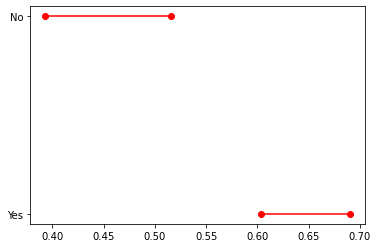

In [231]:
for lb,ub,y in zip(df_ci['lb'],df_ci['ub'],range(len(df_ci))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_ci)),list(df_ci['home']))

The probability of the English Football team winning a home game is between (0.6030552883111224, 0.6900481599647397), while the probability of them winning an away game is between (0.3931896334222213, 0.5159012756686878). The Englsih team clearly has an advantage when playing inside England. This could be due to a number of reasons, including the fans. Fans will be cheering for their own team, boosting moral, so at home games most fans will be cheering them on. At away games, fans are less likley to cheer for them and so their moral is lower.

In [277]:
conditions = [
    (df_eng['tournament']=='Friendly'),
    (df_eng['tournament']!='Friendly')
    ]
values=['Friendly','Official']

In [278]:
df_eng['typematch'] = np.select(conditions, values)

/var/folders/9p/lclsymtn1cz8pt0m19455t0r0000gn/T/ipykernel_61469/2588636400.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eng['typematch'] = np.select(conditions, values)


In [279]:
df_eng['typematch'].value_counts()

Official    431
Friendly    286
Name: typematch, dtype: int64

In [280]:
x=pd.crosstab(df_eng['typematch'],df_eng['result'],margins=True)
x

result,draw,lose,win,All
typematch,,,,
Friendly,72,58,156,286
Official,84,88,259,431
All,156,146,415,717


In [281]:
x=np.array(x)
x

array([[ 72,  58, 156, 286],
       [ 84,  88, 259, 431],
       [156, 146, 415, 717]])

In [282]:
CI_engwin_friendly=proportion_confint(count=x[0,2],nobs=x[0,3],alpha=(1-.95))
CI_engwin_friendly

(0.48774694494485304, 0.6031621459642378)

In [283]:
CI_engwin_official=proportion_confint(count=x[1,2],nobs=x[1,3],alpha=(1-.95))
CI_engwin_official

(0.5546956899682828, 0.6471604585235965)

In [284]:
ci_engwin = {}
ci_engwin['Typematch'] = ['Friendly','Official']
ci_engwin['lb'] = [CI_engwin_friendly[0],CI_engwin_official[0]]
ci_engwin['ub'] = [CI_engwin_friendly[1],CI_engwin_official[1]]
df_ci= pd.DataFrame(ci_engwin)
df_ci

,Typematch,lb,ub
0,Friendly,0.487747,0.603162
1,Official,0.554696,0.647160


([<matplotlib.axis.YTick at 0x7fef9499d6a0>,
 [Text(0, 0, 'Friendly'), Text(0, 1, 'Official')])

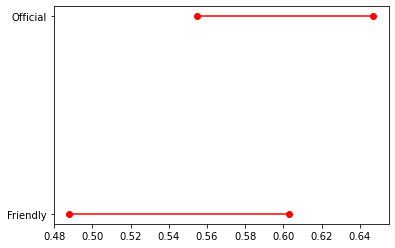

In [285]:
import matplotlib.pyplot as plt
for lb,ub,y in zip(df_ci['lb'],df_ci['ub'],range(len(df_ci))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_ci)),list(df_ci['Typematch']))

The 95% confidence intervals for the English team overlap, which means that there is no statistcal significance to the difference between between the probability that the English team will win a home or away game. 

### Sweden 

In [233]:
df_se=df[df['country']=='Sweden']
df_se.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,result
224,7/12/1908,Sweden,Norway,11,3,Friendly,Gothenburg,Sweden,False,win
296,6/18/1911,Sweden,Germany,2,4,Friendly,Solna,Sweden,False,lose
298,9/17/1911,Sweden,Norway,4,1,Friendly,Solna,Sweden,False,win
328,6/20/1912,Sweden,Hungary,2,2,Friendly,Gothenburg,Sweden,False,draw
330,6/27/1912,Sweden,Finland,7,1,Friendly,Solna,Sweden,False,win


In [234]:
df_se['home']=(df_se['home_team']=='Sweden')

/var/folders/9p/lclsymtn1cz8pt0m19455t0r0000gn/T/ipykernel_61469/3936844897.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_se['home']=(df_se['home_team']=='Sweden')


In [236]:
df_se['home'].value_counts()

True     460
False    195
Name: home, dtype: int64

In [237]:
x=pd.crosstab(df_se['home'],df_se['result'],margins=True)
x

result,draw,lose,win,All
home,,,,
False,40,67,88,195
True,94,90,276,460
All,134,157,364,655


In [238]:
x=np.array(x)
x

array([[ 40,  67,  88, 195],
       [ 94,  90, 276, 460],
       [134, 157, 364, 655]])

In [239]:
CI_se_win_home=proportion_confint(count=x[1,2],nobs=x[1,3],alpha=(1-.95))
CI_se_win_home

(0.5552312677786161, 0.6447687322213839)

In [240]:
CI_se_win_away=proportion_confint(count=x[0,2],nobs=x[0,3],alpha=(1-.95))
CI_se_win_away

(0.38143800380308795, 0.5211260987610146)

In [241]:
ci_se_win = {}
ci_se_win['home'] = ['Yes','No']
ci_se_win['lb'] = [CI_se_win_home[0],CI_se_win_away[0]]
ci_se_win['ub'] = [CI_se_win_home[1],CI_se_win_away[1]]
df_ci= pd.DataFrame(ci_se_win)
df_ci

,home,lb,ub
0,Yes,0.555231,0.644769
1,No,0.381438,0.521126


([<matplotlib.axis.YTick at 0x7fef945efee0>,
 [Text(0, 0, 'Yes'), Text(0, 1, 'No')])

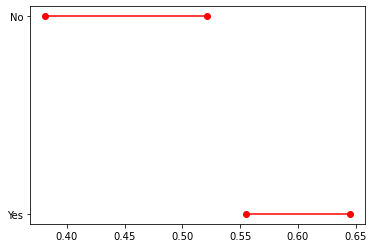

In [242]:
for lb,ub,y in zip(df_ci['lb'],df_ci['ub'],range(len(df_ci))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_ci)),list(df_ci['home']))

The probability of the Swedish Football team winning a home game is between (0.5552312677786161, 0.6447687322213839), while the probability of them winning an away game is between (0.38143800380308795, 0.5211260987610146). The probability of them winning a home game is clearly higher, which shows that the Swedish team clearly has an advantage when playing inside Sweden. This could be due to a number of reasons, including the fans. At home games, most fans will be cheering for them, boosting moral. At away games, fans are less likley to cheer for them and so their moral is lower. 

In [287]:
conditions = [
    (df_se['tournament']=='Friendly'),
    (df_se['tournament']!='Friendly')
    ]
values=['Friendly','Official']

In [289]:
df_se['typematch'] = np.select(conditions, values)

/var/folders/9p/lclsymtn1cz8pt0m19455t0r0000gn/T/ipykernel_61469/747775660.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_se['typematch'] = np.select(conditions, values)


In [290]:
df_se['typematch'].value_counts()

Official    394
Friendly    261
Name: typematch, dtype: int64

In [291]:
x=pd.crosstab(df_se['typematch'],df_se['result'],margins=True)
x

result,draw,lose,win,All
typematch,,,,
Friendly,56,60,145,261
Official,78,97,219,394
All,134,157,364,655


In [292]:
x=np.array(x)
x

array([[ 56,  60, 145, 261],
       [ 78,  97, 219, 394],
       [134, 157, 364, 655]])

In [293]:
CI_sewin_friendly=proportion_confint(count=x[0,2],nobs=x[0,3],alpha=(1-.95))
CI_sewin_friendly

(0.49527179644734187, 0.6158393146637693)

In [294]:
CI_sewin_official=proportion_confint(count=x[1,2],nobs=x[1,3],alpha=(1-.95))
CI_sewin_official

(0.5067756095535363, 0.6048995173500169)

In [295]:
ci_sewin = {}
ci_sewin['Typematch'] = ['Friendly','Official']
ci_sewin['lb'] = [CI_sewin_friendly[0],CI_sewin_official[0]]
ci_sewin['ub'] = [CI_sewin_friendly[1],CI_sewin_official[1]]
df_ci= pd.DataFrame(ci_sewin)
df_ci

,Typematch,lb,ub
0,Friendly,0.495272,0.615839
1,Official,0.506776,0.604900


([<matplotlib.axis.YTick at 0x7fef94a2fb50>,
 [Text(0, 0, 'Friendly'), Text(0, 1, 'Official')])

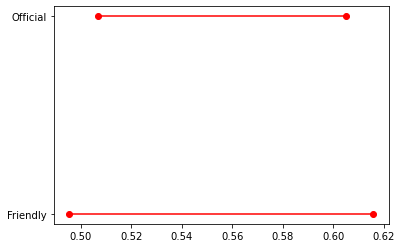

In [296]:
import matplotlib.pyplot as plt
for lb,ub,y in zip(df_ci['lb'],df_ci['ub'],range(len(df_ci))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_ci)),list(df_ci['Typematch']))

The 95% confidence intervals for the Swedish team overlap, which means that there is no statistcal significance to the difference between between the probability that the Swedish team will win a home or away game. 

# Part 2: Analysis of the Covid-19 Pandemic in 2020 and 2021

The following is an anlysis of the COVID-19 pandemic. The data includes 122,843 observations, which are the number of COVID-19 cases and deaths per day per country. I will compute the rate of deaths from COVID-19 to the number of new COVID-19 cases and compare between 2020 and 2021 in terms of several factors like region and income level. 

In [320]:
df=pd.read_csv('covid_data.csv',encoding='latin-1')

In [321]:
df.head()

,date,iso3c,country,income,region,continent,dcases,ddeaths,population,weekdays,month
0,2020-02-24,AFG,Afghanistan,Low income,South Asia,Asia,5,0,38041754,Mon,Feb
1,2020-02-25,AFG,Afghanistan,Low income,South Asia,Asia,0,0,38041754,Tue,Feb
2,2020-02-26,AFG,Afghanistan,Low income,South Asia,Asia,0,0,38041754,Wed,Feb
3,2020-02-27,AFG,Afghanistan,Low income,South Asia,Asia,0,0,38041754,Thu,Feb
4,2020-02-28,AFG,Afghanistan,Low income,South Asia,Asia,0,0,38041754,Fri,Feb


### Death Rate Column 

In [364]:
death_rate = (df['ddeaths']/df['dcases'])*100

In [365]:
df['death_rate']=death_rate

In [367]:
df.head()

,date,iso3c,country,income,region,continent,dcases,ddeaths,population,weekdays,month,death_rate
0,2020-02-24,AFG,Afghanistan,Low income,South Asia,Asia,5,0,38041754,Mon,Feb,0.0
1,2020-02-25,AFG,Afghanistan,Low income,South Asia,Asia,0,0,38041754,Tue,Feb,NaN
2,2020-02-26,AFG,Afghanistan,Low income,South Asia,Asia,0,0,38041754,Wed,Feb,NaN
3,2020-02-27,AFG,Afghanistan,Low income,South Asia,Asia,0,0,38041754,Thu,Feb,NaN
4,2020-02-28,AFG,Afghanistan,Low income,South Asia,Asia,0,0,38041754,Fri,Feb,NaN


### Number of Cases and Death grouped by weekday

In [322]:
from pandas.api.types import CategoricalDtype
cats=['Fri', 'Sat', 'Sun','Mon','Tue','Wed','Thu']
cat_type = CategoricalDtype(categories=cats, ordered=True)
df['weekdays'] = df['weekdays'].astype(cat_type)

In [327]:
stats_days=df.groupby("weekdays").agg({"dcases": [np.mean, np.std, np.size]})
stats_days

dcases                     
                 mean           std   size
weekdays                                  
Fri       2643.215039  13626.207863  17634
Sat       2174.297447  10922.667935  17472
Sun       1852.340706   9559.968071  17496
Mon       2116.600879  11700.105447  17521
Tue       2388.510716  11756.420050  17544
Wed       2601.990272  12848.605924  17578
Thu       2693.674338  14618.890740  17598

In [356]:
stats_days_deaths=df.groupby("weekdays").agg({"ddeaths": [np.mean, np.std, np.size]})
stats_days_deaths

ddeaths                   
               mean         std   size
weekdays                              
Fri       47.990756  208.404740  17634
Sat       40.258413  177.949619  17472
Sun       31.856367  139.320870  17496
Mon       37.954968  155.752300  17521
Tue       50.840002  230.863861  17544
Wed       51.346968  226.105877  17578
Thu       49.695534  224.874945  17598

### Number of Cases and Death grouped by month

In [323]:
cats=['Jan', 'Feb', 'Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
cat_type = CategoricalDtype(categories=cats, ordered=True)
df['month'] = df['month'].astype(cat_type)

In [328]:
stats_months=df.groupby("month").agg({"dcases": [np.mean, np.std, np.size]})
stats_months

dcases                     
              mean           std   size
month                                  
Jan    3330.493183  16114.132615   5868
Feb    1869.261968   7579.872208   6058
Mar    1599.375677   6590.844635   9785
Apr    2294.984731  14842.094035  10872
May    1989.523264  16428.338523  11348
Jun    1433.149046   6561.947273  11010
Jul    2007.870352   7408.384725  11377
Aug    2441.502152  10425.483877  11387
Sep    2223.283062  10260.530149  11040
Oct    2205.899580   7917.525038  11432
Nov    2964.868421  11235.400964  11134
Dec    3979.827003  20864.089717  11532

In [355]:
stats_months_deaths=df.groupby("month").agg({"ddeaths": [np.mean, np.std, np.size]})
stats_months_deaths

ddeaths                   
            mean         std   size
month                              
Jan    71.127812  289.935659   5868
Feb    51.762133  222.814231   6058
Mar    34.963413  171.864116   9785
Apr    52.986479  240.192244  10872
May    46.761720  254.388290  11348
Jun    38.822434  201.438666  11010
Jul    39.192142  175.788522  11377
Aug    42.456749  157.551906  11387
Sep    39.211051  168.449391  11040
Oct    35.094822  143.726925  11432
Nov    44.249506  150.833802  11134
Dec    50.099723  203.325567  11532

### Number of Cases and Death grouped by region

In [324]:
df['region'].unique()

array(['South Asia', 'Sub-Saharan Africa', 'Europe & Central Asia',
       'Middle East & North Africa', 'Latin America & Caribbean',
       'East Asia & Pacific', 'North America(region)'], dtype=object)

In [325]:
cats=['South Asia', 'Sub-Saharan Africa', 'Europe & Central Asia','Middle East & North Africa', 
      'Latin America & Caribbean','East Asia & Pacific', 'North America(region)']
cat_type = CategoricalDtype(categories=cats, ordered=True)
df['region'] = df['region'].astype(cat_type)

In [357]:
stats_region=df.groupby("region").agg({"dcases": [np.mean, np.std, np.size]})
stats_region

dcases                     
                                    mean           std   size
region                                                       
South Asia                   7217.574437  31764.326106   5461
Sub-Saharan Africa            229.925181   1209.021898  30674
Europe & Central Asia        2968.733221   9229.431160  34358
Middle East & North Africa   1229.900426   3018.473480  14080
Latin America & Caribbean    2189.464464   7735.846338  21795
East Asia & Pacific          1235.455300   3660.116639  15056
North America(region)       40192.648344  64990.088304   1419

In [358]:
stats_region_deaths=df.groupby("region").agg({"ddeaths": [np.mean, np.std, np.size]})
stats_region_deaths

ddeaths                   
                                  mean         std   size
region                                                   
South Asia                  104.868339  409.742533   5461
Sub-Saharan Africa            5.024255   30.945666  30674
Europe & Central Asia        48.536556  132.629152  34358
Middle East & North Africa   20.600142   54.465385  14080
Latin America & Caribbean    71.517963  256.405124  21795
East Asia & Pacific          22.542973   97.210626  15056
North America(region)       604.988020  881.054802   1419

### 95% Confidence Interval of the Mean Daily Cases per Month

In [330]:
import scipy.stats 

In [331]:
stats_months.index

CategoricalIndex(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug',
                  'Sep', 'Oct', 'Nov', 'Dec'],
                 categories=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', ...], ordered=True, dtype='category', name='month')

In [332]:
ci95_high = []
ci95_low = []

In [333]:
for i in stats_months.index:
    m, s, n = stats_months.loc[i]
    x=scipy.stats.t.interval(.95, n-1, m,s/np.sqrt(n-1))
    ci95_high.append(x[1])
    ci95_low.append(x[0])

In [334]:
ci95_high

[3742.9102077318885,
 2060.1892456474006,
 1729.9881560656577,
 2574.018573108584,
 2291.8297985167155,
 1555.738932493392,
 2144.022042525728,
 2633.0180761182896,
 2414.708938678329,
 2351.057725728849,
 3173.5950123885564,
 4360.6819798820925]

In [335]:
ci95_low

[2918.076159002944,
 1678.3346896447754,
 1468.7631980477813,
 2015.95088973174,
 1687.2167295058437,
 1310.5591601496599,
 1871.718662405273,
 2249.986227034429,
 2031.8571845100769,
 2060.741434523075,
 2756.141829716707,
 3598.972026361404]

In [336]:
stats_months['ci95_high'] = ci95_high
stats_months['ci95_low'] = ci95_low
print(stats_months)

            dcases                         ci95_high     ci95_low
              mean           std   size                          
month                                                            
Jan    3330.493183  16114.132615   5868  3742.910208  2918.076159
Feb    1869.261968   7579.872208   6058  2060.189246  1678.334690
Mar    1599.375677   6590.844635   9785  1729.988156  1468.763198
Apr    2294.984731  14842.094035  10872  2574.018573  2015.950890
May    1989.523264  16428.338523  11348  2291.829799  1687.216730
Jun    1433.149046   6561.947273  11010  1555.738932  1310.559160
Jul    2007.870352   7408.384725  11377  2144.022043  1871.718662
Aug    2441.502152  10425.483877  11387  2633.018076  2249.986227
Sep    2223.283062  10260.530149  11040  2414.708939  2031.857185
Oct    2205.899580   7917.525038  11432  2351.057726  2060.741435
Nov    2964.868421  11235.400964  11134  3173.595012  2756.141830
Dec    3979.827003  20864.089717  11532  4360.681980  3598.972026


In [337]:
df_ci= pd.DataFrame(stats_months)
df_ci

dcases                         ci95_high     ci95_low
              mean           std   size                          
month                                                            
Jan    3330.493183  16114.132615   5868  3742.910208  2918.076159
Feb    1869.261968   7579.872208   6058  2060.189246  1678.334690
Mar    1599.375677   6590.844635   9785  1729.988156  1468.763198
Apr    2294.984731  14842.094035  10872  2574.018573  2015.950890
May    1989.523264  16428.338523  11348  2291.829799  1687.216730
Jun    1433.149046   6561.947273  11010  1555.738932  1310.559160
Jul    2007.870352   7408.384725  11377  2144.022043  1871.718662
Aug    2441.502152  10425.483877  11387  2633.018076  2249.986227
Sep    2223.283062  10260.530149  11040  2414.708939  2031.857185
Oct    2205.899580   7917.525038  11432  2351.057726  2060.741435
Nov    2964.868421  11235.400964  11134  3173.595012  2756.141830
Dec    3979.827003  20864.089717  11532  4360.681980  3598.972026

In [338]:
df_ci.index

CategoricalIndex(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug',
                  'Sep', 'Oct', 'Nov', 'Dec'],
                 categories=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', ...], ordered=True, dtype='category', name='month')

In [339]:
df_ci['month']=df_ci.index
df_ci

dcases                         ci95_high     ci95_low month
              mean           std   size                                
month                                                                  
Jan    3330.493183  16114.132615   5868  3742.910208  2918.076159   Jan
Feb    1869.261968   7579.872208   6058  2060.189246  1678.334690   Feb
Mar    1599.375677   6590.844635   9785  1729.988156  1468.763198   Mar
Apr    2294.984731  14842.094035  10872  2574.018573  2015.950890   Apr
May    1989.523264  16428.338523  11348  2291.829799  1687.216730   May
Jun    1433.149046   6561.947273  11010  1555.738932  1310.559160   Jun
Jul    2007.870352   7408.384725  11377  2144.022043  1871.718662   Jul
Aug    2441.502152  10425.483877  11387  2633.018076  2249.986227   Aug
Sep    2223.283062  10260.530149  11040  2414.708939  2031.857185   Sep
Oct    2205.899580   7917.525038  11432  2351.057726  2060.741435   Oct
Nov    2964.868421  11235.400964  11134  3173.595012  2756.141830   Nov
Dec    3979.827003  20864.089717  11532  4360.681980  3598.972026   Dec

In [340]:
import matplotlib.pyplot as plt

([<matplotlib.axis.YTick at 0x7fef78787370>,
 [Text(0, 0, 'Jan'),
  Text(0, 1, 'Feb'),
  Text(0, 2, 'Mar'),
  Text(0, 3, 'Apr'),
  Text(0, 4, 'May'),
  Text(0, 5, 'Jun'),
  Text(0, 6, 'Jul'),
  Text(0, 7, 'Aug'),
  Text(0, 8, 'Sep'),
  Text(0, 9, 'Oct'),
  Text(0, 10, 'Nov'),
  Text(0, 11, 'Dec')])

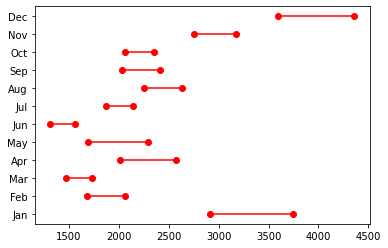

In [341]:
for lb,ub,y in zip(df_ci['ci95_low'],df_ci['ci95_high'],range(len(df_ci))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_ci)),list(df_ci['month']))

The month of December has the highest mean number of daily COVID-19 cases, with a 95% confidence interval of (4360.681980, 3598.972026). November and January also have a mean number of daily COVID cases that is significantly higher than the rest. This could be due to the whether and the many holidays during these months. 

### Daily Cases by Weekday and Month in Africa 

In [342]:
df_africa=df[df['continent']=='Africa']

In [371]:
stats_days_africa=df_africa.groupby("weekdays").agg({"dcases": [np.mean, np.std, np.size]})
stats_days_africa

dcases                   
                mean          std  size
weekdays                               
Fri       311.194054  1327.936280  4978
Sat       274.849179  1261.018288  4933
Sun       242.797935  1123.745040  4939
Mon       231.249697   877.708464  4946
Tue       254.994145  1041.459782  4953
Wed       316.406691  1356.637185  4962
Thu       335.889851  1427.718515  4966

In [376]:
stats_months_africa=df_africa.groupby("month").agg({"dcases": [np.mean, np.std, np.size]})
stats_months_africa

dcases                   
             mean          std  size
month                               
Jan    491.986001  1905.282764  1643
Feb    216.968149   412.901707  1507
Mar    132.331977   338.573755  2458
Apr    119.899068   383.510432  3111
May    119.238546   380.337268  3274
Jun    289.447484  1223.268231  3180
Jul    525.685636  2029.631410  3286
Aug    427.623554  1509.267684  3286
Sep    235.870440   808.103800  3180
Oct    151.285453   458.282186  3286
Nov    179.502830   663.978781  3180
Dec    503.324102  2000.098956  3286

In [377]:
stats_months_africa.index

CategoricalIndex(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug',
                  'Sep', 'Oct', 'Nov', 'Dec'],
                 categories=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', ...], ordered=True, dtype='category', name='month')

In [385]:
ci95_high = []
ci95_low = []

In [386]:
for i in stats_months_africa.index:
    m, s, n = stats_months_africa.loc[i]
    x=scipy.stats.t.interval(.95, n-1, m,s/np.sqrt(n-1))
    ci95_high.append(x[1])
    ci95_low.append(x[0])

In [387]:
ci95_high

[584.2094157987599,
 237.83858163087194,
 145.72605435372427,
 133.3829246066633,
 132.27335304125356,
 331.9867419028808,
 595.1173081424464,
 479.25410102708315,
 263.97231921560217,
 166.96283127317764,
 202.5927492247392,
 571.7454984913564]

In [388]:
ci95_low

[399.76258663581103,
 196.09771564849103,
 118.93790008077534,
 106.41521104103842,
 106.20373920065235,
 246.90822665057829,
 456.25396392085247,
 375.99300791996495,
 207.76856128754244,
 135.60807560448518,
 156.41291115261927,
 434.90270601259977]

In [390]:
stats_months_africa['ci95_high'] = ci95_high
stats_months_africa['ci95_low'] = ci95_low

In [391]:
df_ci= pd.DataFrame(stats_months_africa)
df_ci

dcases                      ci95_high    ci95_low
             mean          std  size                        
month                                                       
Jan    491.986001  1905.282764  1643  584.209416  399.762587
Feb    216.968149   412.901707  1507  237.838582  196.097716
Mar    132.331977   338.573755  2458  145.726054  118.937900
Apr    119.899068   383.510432  3111  133.382925  106.415211
May    119.238546   380.337268  3274  132.273353  106.203739
Jun    289.447484  1223.268231  3180  331.986742  246.908227
Jul    525.685636  2029.631410  3286  595.117308  456.253964
Aug    427.623554  1509.267684  3286  479.254101  375.993008
Sep    235.870440   808.103800  3180  263.972319  207.768561
Oct    151.285453   458.282186  3286  166.962831  135.608076
Nov    179.502830   663.978781  3180  202.592749  156.412911
Dec    503.324102  2000.098956  3286  571.745498  434.902706

In [392]:
df_ci['month']=df_ci.index
df_ci

dcases                      ci95_high    ci95_low month
             mean          std  size                              
month                                                             
Jan    491.986001  1905.282764  1643  584.209416  399.762587   Jan
Feb    216.968149   412.901707  1507  237.838582  196.097716   Feb
Mar    132.331977   338.573755  2458  145.726054  118.937900   Mar
Apr    119.899068   383.510432  3111  133.382925  106.415211   Apr
May    119.238546   380.337268  3274  132.273353  106.203739   May
Jun    289.447484  1223.268231  3180  331.986742  246.908227   Jun
Jul    525.685636  2029.631410  3286  595.117308  456.253964   Jul
Aug    427.623554  1509.267684  3286  479.254101  375.993008   Aug
Sep    235.870440   808.103800  3180  263.972319  207.768561   Sep
Oct    151.285453   458.282186  3286  166.962831  135.608076   Oct
Nov    179.502830   663.978781  3180  202.592749  156.412911   Nov
Dec    503.324102  2000.098956  3286  571.745498  434.902706   Dec

([<matplotlib.axis.YTick at 0x7fef798c3af0>,
 [Text(0, 0, 'Jan'),
  Text(0, 1, 'Feb'),
  Text(0, 2, 'Mar'),
  Text(0, 3, 'Apr'),
  Text(0, 4, 'May'),
  Text(0, 5, 'Jun'),
  Text(0, 6, 'Jul'),
  Text(0, 7, 'Aug'),
  Text(0, 8, 'Sep'),
  Text(0, 9, 'Oct'),
  Text(0, 10, 'Nov'),
  Text(0, 11, 'Dec')])

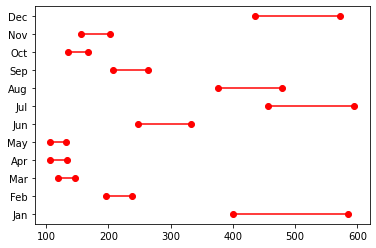

In [393]:
for lb,ub,y in zip(df_ci['ci95_low'],df_ci['ci95_high'],range(len(df_ci))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_ci)),list(df_ci['month']))

### Comparing Africa to the Whole World  

The two graphs of the confidence intervals show that Africa doesn't follow the global trend in COVID-19 case spikes. July and August, some of the months with the most cases in Africa have the lowest number of cases globaly. There also seems to be higher more months with spikes than the global average. 